<a href="https://colab.research.google.com/github/ruan64/Analise-de-Filmes-Dataset/blob/master/Analise_de_filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Criação da função men_ci
mean_ci <- function(x, conf = 0.95) {
  m <- mean(x, na.rm = TRUE)
  se <- sd(x, na.rm = TRUE) / sqrt(sum(!is.na(x)))

  t_crit <- qt((1 + conf) / 2, df = sum(!is.na(x)) - 1)
  ymin <- m - t_crit * se
  ymax <- m + t_crit * se
  data.frame(y = m, ymin = ymin, ymax = ymax)
}


In [15]:
#instalação da biblioteca ggplot2
install.packages("ggplot2", repos = "http://cran.r-project.org")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
# Instala o pacote pacman
if (!require(pacman)) install.packages("pacman")

# Usa pacman para carregar os pacotes desejados
pacman::p_load(ggplot2, dplyr)


In [17]:
#importando a Tabela para a variavel dados
dados <- read.csv("/content/drive/MyDrive/LucroFilmes.csv", stringsAsFactors = TRUE, check.names = FALSE, row.names = NULL)

In [18]:
#Mostrar a o tipo da Variavel das colunas
library(dplyr)

dados <- read.csv2("/content/drive/MyDrive/LucroFilmes.csv", stringsAsFactors = TRUE)

In [10]:
#Visualização
View (dados)

DataLancamento,Filme,Orcamento,LucroLocal,LucroMundial,Distribuidor,Classificacao,Genero
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
6/22/2007,Evan Almighty,1.75e+08,100289690,174131329,Universal,PG,Comedia
7/28/1995,Waterworld,1.75e+08,88246220,264246220,Universal,PG-13,Acao
05/12/2017,King Arthur: Legend of the Sword,1.75e+08,39175066,139950708,Warner Bros.,PG-13,Aventura
12/25/2013,47 Ronin,1.75e+08,38362475,151716815,Universal,PG-13,Acao
6/22/2018,Jurassic World: Fallen Kingdom,1.70e+08,416769345,1304866322,Universal,PG-13,Acao
08/01/2014,Guardians of the Galaxy,1.70e+08,333172112,771051335,Walt Disney,PG-13,Acao
05/07/2010,Iron Man 2,1.70e+08,312433331,621156389,Paramount Pictures,PG-13,Acao
04/04/2014,Captain America: The Winter Soldier,1.70e+08,259746958,714401889,Walt Disney,PG-13,Acao
07/11/2014,Dawn of the Planet of the Apes,1.70e+08,208545589,710644566,20th Century Fox,PG-13,Aventura


In [19]:
#Mostrar o tipo Da Variavel
glimpse(dados)

Rows: 3,401
Columns: 8
$ DataLancamento <fct> 6/22/2007, 7/28/1995, 05/12/2017, 12/25/2013, 6/22/2018…
$ Filme          <fct> "Evan Almighty", "Waterworld", "King Arthur: Legend of …
$ Orcamento      <dbl> 1.75e+08, 1.75e+08, 1.75e+08, 1.75e+08, 1.70e+08, 1.70e…
$ LucroLocal     <dbl> 100289690, 88246220, 39175066, 38362475, 416769345, 333…
$ LucroMundial   <dbl> 174131329, 264246220, 139950708, 151716815, 1304866322,…
$ Distribuidor   <fct> Universal, Universal, Warner Bros., Universal, Universa…
$ Classificacao  <fct> PG, PG-13, PG-13, PG-13, PG-13, PG-13, PG-13, PG-13, PG…
$ Genero         <fct> Comedia, Acao, Aventura, Acao, Acao, Acao, Acao, Acao, …


In [12]:
#Converter a data que estar em formato do padrao dos estados unidos
dados$DataLancamento <- as.Date(dados$DataLancamento, format = "%m/%d/%Y")

In [20]:
#Converter a data que estar em formato do padrao dos estados unidos
dados$DataLancamento <- as.Date(dados$DataLancamento, format = "%m/%d/%Y")

`geom_smooth()` using formula = 'y ~ x'


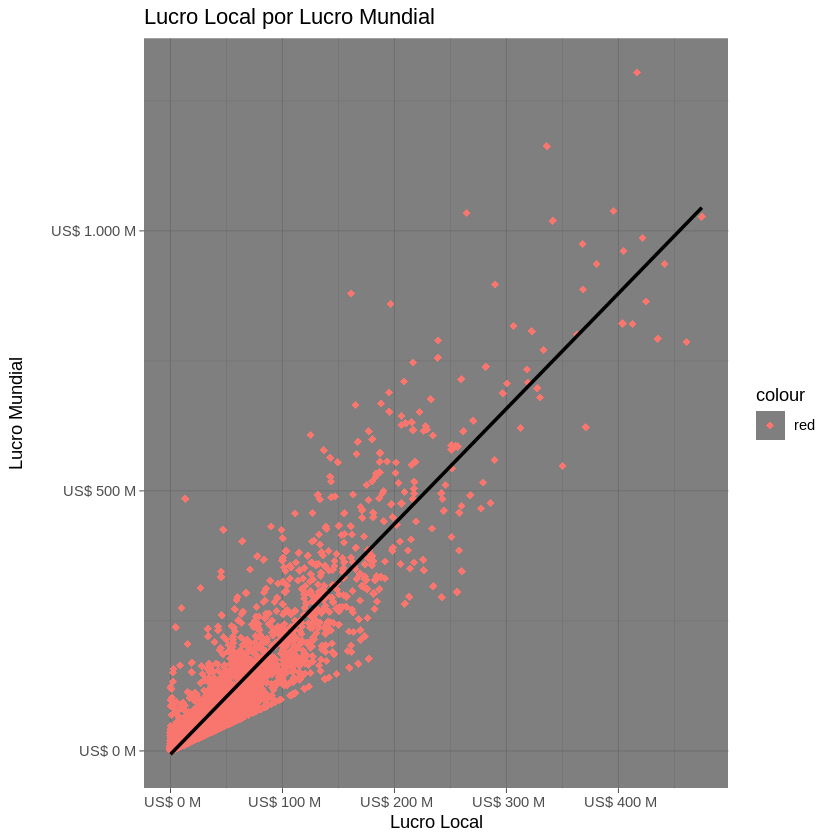

In [21]:
#Criar Gráfico de dispersão
gs <-ggplot(data = dados) +
#Gerando as coordenadas dos pontos
  geom_point(aes(y = LucroMundial , x = LucroLocal , color = "red"), shape = 18, size = 2) +
#Gerando a linha do Grafico
  geom_smooth(aes(y = LucroMundial , x = LucroLocal ),method = "lm", se = F, color = "black")+
  labs(y = "Lucro Mundial", x = "Lucro Local", title = "Lucro Local por Lucro Mundial")+
#Formatando o Gráfico
#Tirando os numeros de notação científica
#colocando manualmente do sibolo de dólar
#Indicando que os números é em Milhões
  scale_y_continuous(labels = scales::number_format(big.mark = ".", decimal.mark = ",",
                                                    prefix = " US$ ",
                                                    scale = 1e-6, suffix = " M"))+
  scale_x_continuous(labels = scales::number_format(big.mark = ".",decimal.mark = ",",
                                                    prefix = " US$ ",
                                                    scale = 1e-6, suffix = " M"))+
#Mudando o Tema do grafico
                                                    theme_dark()
  gs




`geom_smooth()` using formula = 'y ~ x'


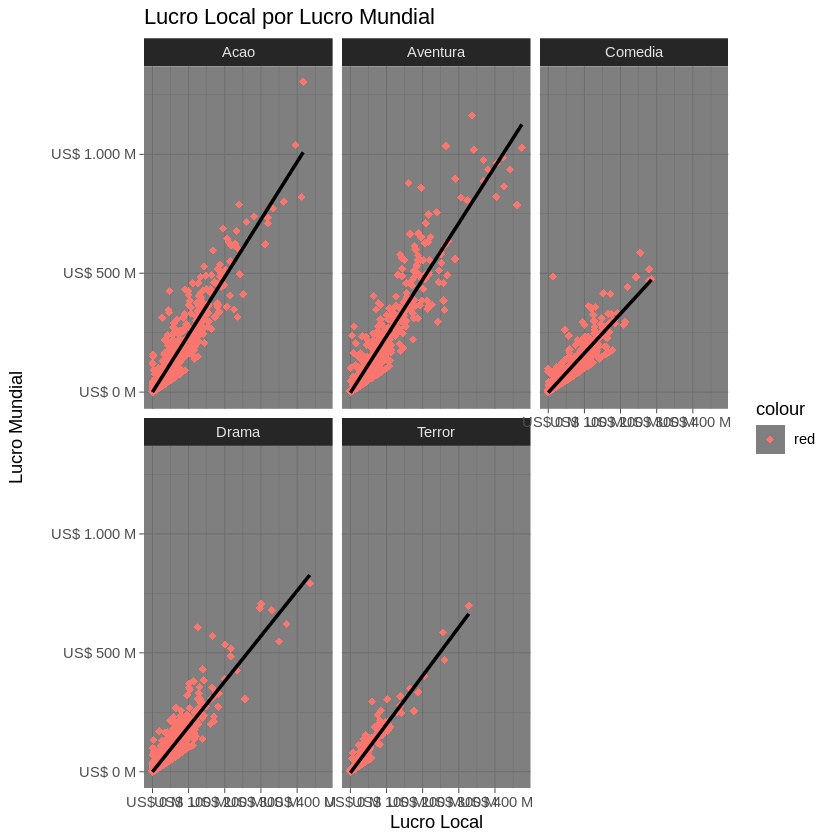

In [23]:
#dividindo o Gráfico por Gênero do filme
gs + facet_wrap (~ Genero)